# Analyzing Restaurant Customer Reviews to Improve Customer Experience

# Introduction
What makes a restaurant reviewer give a good or bad rating? What keywords do reviewers say and what is their sentiment that motivates them to give a restaurant one star, five star, or somewhere in-between? Businesses use reviews as well as social media posts to try to understand why customers' views are overall positive or negative, then target specific groups, such as dissatisfied customers, using best-practice marketing techniques to get them to patronize their restaurants as repeat customers. For example, a restaurant manager may publicly reply to a bad Yelp review by apologizing, personally reaching out to the customer to contact him/her, and rectifying the situation with a free or discounted meal in the hopes that the customer will have a better experience the next time around. This also demonstrates to other Yelpers that management/ownership cares about its reputation and customers. Here, we use **Natural Language Processing (NLP)** techniques to break down [Yelp reviews](https://www.kaggle.com/caiying100126/yelp-review-data) and understand why customers rate restaurants as being good or bad. We analyze keywords, customer sentiment, and key phrases and topics written in the reviews to determine why customers give specific ratings to restaurants.

In [1]:
# Module for NLP techniques
import nltk

import pandas as pd

# Activate download and/or installation commands for NLP in this notebook by removing the #hashtags

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('vader_lexicon')

## Load Yelp Reviews

In [79]:
reviews_df = pd.read_csv('yelp_review_data.csv')
reviews_df['num_words'] = reviews_df['review_text'].apply(len)
reviews_df.head(10)

date  user_id  prod_id prod_name  \
0  2014/11/16     5044        0     Toast   
1    2014/9/8     5045        0     Toast   
2   2013/10/6     5046        0     Toast   
3  2014/11/30     5047        0     Toast   
4   2014/8/28     5048        0     Toast   
5   2013/7/16     5049        0     Toast   
6    2013/3/3     5050        0     Toast   
7   2014/12/5     5051        0     Toast   
8  2014/11/26     5052        0     Toast   
9  2014/11/17     5053        0     Toast   

                                         review_text  rating  label  num_words  
0  Drinks were bad, the hot chocolate was watered...       1      1        187  
1  This was the worst experience I've ever had a ...       1      1       1375  
2  This is located on the site of the old Spruce ...       3      1        257  
3  I enjoyed coffee and breakfast twice at Toast ...       5      1       1318  
4  I love Toast! The food choices are fantastic -...       5      1        808  
5  The egg on an English muffin (their take on eg...       5      1        423  
6  wonderful relaxed vibe and fantastic homemade ...       5      1        196  
7  Extremely slow kitchen. I went with an hour to...       1      0        397  
8  I really wanted to love toast. It's quaint and...       2      0       1515  
9  First brunch experience here in Philly (actual...       4      0        834

## Exploratory Data Analysis

In [3]:
print('{:,} unique restaurants/businesses were reviewed'.format(reviews_df['prod_name'].nunique()))

5,044 unique restaurants/businesses were reviewed


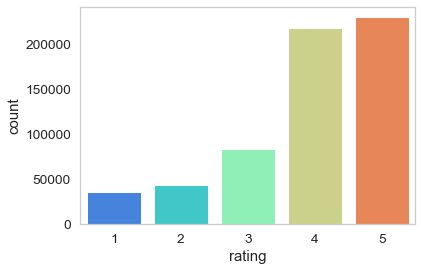

In [78]:
import seaborn as sns
sns.countplot(x='rating', data=reviews_df, palette='rainbow')

Most of the reviewers give 4- or 5-star rating

### What is the average rating of restaurants with the most number of reviews (i.e. most popular restaurants)?

In [4]:
top_counts = pd.DataFrame(reviews_df.groupby('prod_name')['rating'].count().sort_values(ascending=False))
top_counts.rename(columns={'rating':'count'}, inplace=True)
top_counts['rating'] = pd.DataFrame(reviews_df.groupby('prod_name')['rating'].mean())
top_counts.rename(columns={'rating':'avg rating'}, inplace=True)
top_counts.head(20)

count  avg rating
prod_name                                       
Ippudo NY                       7378    4.073597
The Halal Guys                  6632    4.299306
Lombardi’s Pizza                4716    3.944656
Grimaldi’s                      3938    3.746318
Joe’s Shanghai                  3143    3.801782
Pommes Frites                   3122    4.157591
Totto Ramen                     2999    3.965989
Pat’s King of Steaks            2959    3.274417
Eataly NYC                      2943    3.720014
Artichoke Basille’s Pizza       2858    3.891882
Reading Terminal Market         2696    4.543027
Clinton Street Baking Company   2677    3.951812
Cafe Habana                     2560    4.035156
Prosperity Dumpling             2536    4.337145
Geno’s Steaks                   2497    2.505807
The Meatball Shop               2292    4.013525
The Spotted Pig                 2183    3.767293
L & B Spumoni Gardens           2165    4.152425
Cafeteria                       2158    3.515755
Balthazar Restaurant            2075    3.990361

Ippudo NY, The Halal Guys, and Lombardis Pizza have the most number of reviews

### Distribution of reviews

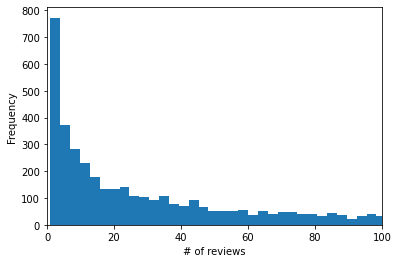

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_counts['count'].plot.hist(bins=2500)
plt.xlim(0, 100)
plt.xlabel('# of reviews')
plt.show()

Many restaurants/businesses have only 1-2 reviews

### What is the average rating of top restaurants with at least 10 reviews?

In [6]:
# Show only results with >= 10 reviews
top_ratings = top_counts[top_counts['count']>=10].sort_values('avg rating', ascending=False)
top_ratings.head(20)

count  avg rating
prod_name                                                         
Donuts Time Cafe                                    11    5.000000
Andrea Foods                                        10    5.000000
Ahh La Cart                                         12    5.000000
John’s Centre Deli & Restaurant                     10    5.000000
Izakaya                                             18    4.944444
Shehrazad’s Cafe & Grill                            15    4.933333
Crab Palace                                         12    4.916667
Buen Provecho                                       12    4.916667
Lunitas                                             44    4.909091
Mountain Province                                   65    4.907692
Cafe Walnut                                         19    4.894737
Ringolevio                                          17    4.882353
Takei Sushi                                         24    4.875000
The Gumbo Bros                                      16    4.875000
STATE Grill and Bar                                 16    4.875000
Honest Chops                                        30    4.866667
Sandra’s Next Generation                           105    4.866667
10 Devoe                                            22    4.863636
Bolivian Llama Party                                33    4.848485
Appetizzio’s Italian Specialties & World Market     33    4.848485

### What is the average rating of the worst restaurants with at least 10 reviews?

In [7]:
# Show only results with >= 10 reviews
bad_ratings = top_counts[top_counts['count']>=10].sort_values('avg rating', ascending=True)
bad_ratings.head(20)

count  avg rating
prod_name                                   
Guinness Pub                  23    1.391304
Bella Anthony’s - CLOSED      10    1.400000
Planet Wings                  14    1.428571
Papa John’s Pizza             10    1.500000
Romano’s Macaroni Grill_1     28    1.500000
Downtown At the Taft          10    1.600000
Village Pizza                 10    1.700000
Habaneros                     12    1.750000
D & K Buffet                  13    1.769231
Empire Pizza                  10    1.800000
Master Barbecue & Grill       10    1.800000
Ocean Buffet                  41    1.804878
Ruby Tuesdays                 16    1.812500
Bayway Diner                  10    1.900000
Lawrence Grill                13    1.923077
Jersey Bbq Pit                14    1.928571
Hamachi Sushi                 33    1.939394
Pei Wei Asian Diner           84    1.952381
The Oyster Bar                47    1.957447
Lebanon Village Pizza         25    2.000000

### How many characters are in a typical review?

Text(0.5, 0, '# of words')

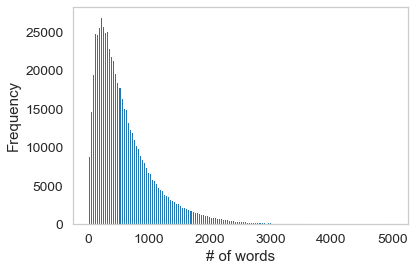

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

reviews_df['num_words'].plot.hist(bins=150)
plt.xlabel('# of words')

In [81]:
reviews_df['num_words'].describe()

count    608598.000000
mean        628.973413
std         578.208864
min           1.000000
25%         243.000000
50%         462.000000
75%         825.000000
max        5000.000000
Name: num_words, dtype: float64

### Let's check out the review with the highest number of words (5,000)

In [82]:
reviews_df[reviews_df['num_words'] == 5000]['review_text'].iloc[0]

'I decided to eat healthy with my family and called am order from this establishment around 8:03pm on Friday December 7th 2012. \xa0I ordered a hamburger deluxe no onions and two mega Greek salads with grilled chicken and no onions. I was informed that my order would be ready in about 15 minutes. I arrived at Teddy\'s Place around 8:16pm and was informed that it would be ready in 5 minutes. \xa0I had no problem with this and waited and watched to other customers orders come walk in and make two gyro platters were ordered. \xa0As the clock starts to round 8:32, I ask if my salads ready?" the woman replies it should be about 5 more minutes. I look around and realize that I am the only person left in this establishment; even the people arriving after me are gone. I watch as the manager asked the hostess, "What is he waiting for? " she informs him of my order then he says, " tell him to pay then!" We both reply at the same time" I "already paid." I ask for the manager and explain that I ha

**Wow.. a very bad review!**

### The greater the number of words, the worse the rating will be

In [83]:
by_ratings = pd.DataFrame(reviews_df.groupby('rating')['num_words'].mean())
by_ratings

num_words
rating            
1       755.175309
2       773.230755
3       700.053188
4       622.337351
5       562.890218

In general, number of words > 700, on average, result in ratings of 1 or 2, while number of words < 625 result in ratings of 4 or 5. Number of words with an average of ~700 result in a rating of 3.

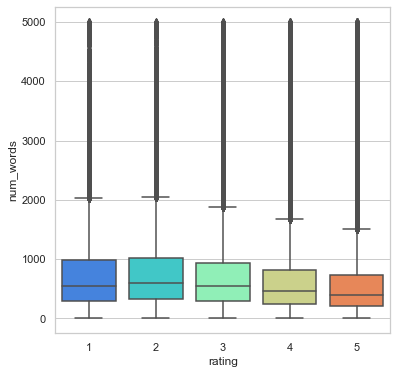

In [95]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style('whitegrid')
sns.boxplot(x='rating', y='num_words', data=reviews_df, palette='rainbow')

**The averages for each rating are very close to each other, but there are so many outliers outside all rating boxplots. Num_words is probably not a good feature to predict rating.**

## Classify reviews into bad (1-3 stars) or good (4-5 stars) ratings

In [12]:
reviews_df['is_bad_review'] = reviews_df['rating'].apply(lambda x: 1 if x < 4 else 0)

reviews_df = reviews_df[['review_text', 'is_bad_review']]
reviews_df.head(20)

review_text  is_bad_review
0   Drinks were bad, the hot chocolate was watered...              1
1   This was the worst experience I've ever had a ...              1
2   This is located on the site of the old Spruce ...              1
3   I enjoyed coffee and breakfast twice at Toast ...              0
4   I love Toast! The food choices are fantastic -...              0
5   The egg on an English muffin (their take on eg...              0
6   wonderful relaxed vibe and fantastic homemade ...              0
7   Extremely slow kitchen. I went with an hour to...              1
8   I really wanted to love toast. It's quaint and...              1
9   First brunch experience here in Philly (actual...              0
10  Coffee is great and I live close so it's conve...              1
11  My family and I found this hidden gem while we...              0
12  So many great things to say about this place ....              0
13  .. I wanted to love this place... I stopped by...              1
14  The coffee is just better hear than all of the...              0
15  Toast was very good for breakfast when you wan...              0
16  Great Location, Love the vibe, food and love t...              0
17  Toast is a comfortable and artistic environmen...              0
18  I stopped into Toast on my way to work to use ...              0
19  Toast is ok. My goat cheese, tomato and spinac...              1

In [13]:
reviews_df.shape

(608598, 2)

# Data preprocessing

## Check for Null Values

In [14]:
null_count = reviews_df.isnull().sum()
null_pct = ((reviews_df.isnull().sum())/(reviews_df.isnull().count()))*100
null_type = reviews_df.dtypes
missing_data = pd.concat([null_count, null_pct, null_type], axis = 1, keys = ['Null Values', 'Percent of Total', 'Data Type'])
missing_data = missing_data.sort_values(by = 'Percent of Total', ascending = False).round(2)

missing_data.head()

Null Values  Percent of Total Data Type
review_text              0               0.0    object
is_bad_review            0               0.0     int64

## Sample data
- Too many reviews in original dataset will slow down runtime in our various NLP analyses
- We will take 10% of the total number of reviews

In [15]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

## Clean up and sort review text by removing stopwords, tokenizing, lemmatizing, and categorizing (tagging) words

In [16]:
%%time

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(' ')]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df['review_clean'] = reviews_df['review_text'].apply(lambda x: clean_text(x))

Wall time: 12min 14s


# EDA, TF-IDF, sentiment analysis, and prediction accuracy of good/bad reviews

## Calculate neutrality, positivity, negativity, and compound scores for sentiment analysis

In [17]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df['sentiments'] = reviews_df['review_clean'].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1),
                        reviews_df['sentiments'].apply(pd.Series)], axis=1)

## Total number of characters and words

In [18]:
# add number of characters column
reviews_df['nb_chars'] = reviews_df['review_clean'].apply(lambda x: len(x))

# add number of words column
reviews_df['nb_words'] = reviews_df['review_clean'].apply(lambda x: len(x.split(' ')))

In [19]:
# pip install -U gensim

## Assign a numerical vector to every document in corpus using *doc2vec*
- Document vector represents the concept or topic of a document
- Prediction of neighboring words depends on document
- Based on *word2vec*, with an additional vector (Paragraph ID)
- Two implementations - (1) Paragraph Vector-Distributed Memory (PV-DM); (2) Paragraph-Vector-Distributed Bag of Words (PV-DBOW)
- *PV-DM:* Predict **central word** from a neural network based on average of context word vectors and the document vector
- *PV-DBOW:* Predict a **set of words** from a neural network based on document vector; similar to *word2vec* skip gram

In [20]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i])
             for i, doc in enumerate(reviews_df['review_clean'].apply(lambda x: x.split(' ')))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df['review_clean'].apply(lambda x: model.infer_vector(x.split(' '))).apply(pd.Series)
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

## Term Frequency-Inverse Document Frequency (TF-IDF)
- Term Frequency X Inverse Document Frequency
\begin{equation*}
w_{x,y} = tf_{x,y} \text{  X  } log\Bigl(\frac{N}{df_{x}}\Bigl)
\end{equation*}
Where: <br />
$w_{x,y}$ is the TF-IDF score of term *x* in *y* document <br />
$tf_{x,y}$ = frequency of *x* in *y* <br />
$df_{x}$ = number of documents containing *x* <br />
*N* = total number of documents <br />
*x* = Term / Word <br />
*y* = Document / Review <br /><br />
- Number of times word appears in a document (review) X relative importance of word based on word presence in multiple documents
- The more documents a word is present, the less important it is

In [21]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df['review_clean']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ['word_' + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [22]:
pd.options.display.max_columns = 11000
reviews_df.head()

review_text  is_bad_review  \
505889  Pros: + Service was welcoming and super friend...              1   
339506  My earlier review was mistakenly posted to thi...              0   
113303  The food here was so good! The ambiance is won...              0   
163915  I would give Bea 6 stars if I could. Simply be...              0   
559999  This place is nice man..i wish we had this car...              0   

                                             review_clean    neg    neu  \
505889  pro service welcome super friendly menu range ...  0.056  0.730   
339506  earlier review mistakenly post restaurant real...  0.076  0.685   
113303  food good ambiance wonderful menu variaty tast...  0.076  0.581   
163915  would give bea star could simply area dead zon...  0.105  0.604   
559999  place nice man..i wish cart texas guess doesnt...  0.039  0.614   

          pos  compound  nb_chars  nb_words  doc2vec_vector_0  \
505889  0.213    0.9570       654       103         -0.379368   
339506  0.238    0.9246       510        73         -0.076849   
113303  0.343    0.9300       229        36         -0.107420   
163915  0.291    0.9485       380        65          0.052743   
559999  0.347    0.8600       130        21          0.009480   

        doc2vec_vector_1  doc2vec_vector_2  doc2vec_vector_3  \
505889          0.475549          0.011835          0.299056   
339506          0.158419          0.147197          0.126801   
113303          0.228974          0.041830         -0.059083   
163915          0.326631         -0.076001          0.256024   
559999          0.034562          0.164161          0.021307   

        doc2vec_vector_4  word_aback  word_abandon  word_abc  word_abeille  \
505889         -0.023522         0.0           0.0       0.0           0.0   
339506          0.370056         0.0           0.0       0.0           0.0   
113303          0.145980         0.0           0.0       0.0           0.0   
163915          0.405376         0.0           0.0       0.0           0.0   
559999          0.044571         0.0           0.0       0.0           0.0   

        word_ability  word_abita  word_able  word_abound  word_about  \
505889           0.0         0.0        0.0          0.0         0.0   
339506           0.0         0.0        0.0          0.0         0.0   
113303           0.0         0.0        0.0          0.0         0.0   
163915           0.0         0.0        0.0          0.0         0.0   
559999           0.0         0.0        0.0          0.0         0.0   

        word_above  word_abroad  word_abrupt  word_abruptly  word_absence  \
505889         0.0          0.0          0.0            0.0           0.0   
339506         0.0          0.0          0.0            0.0           0.0   
113303         0.0          0.0          0.0            0.0           0.0   
163915         0.0          0.0          0.0            0.0           0.0   
559999         0.0          0.0          0.0            0.0           0.0   

        word_absent  word_absinthe  word_absolute  word_absolutely  \
505889          0.0            0.0            0.0              0.0   
339506          0.0            0.0            0.0              0.0   
113303          0.0            0.0            0.0              0.0   
163915          0.0            0.0            0.0              0.0   
559999          0.0            0.0            0.0              0.0   

        word_absorb  word_absurd  word_absurdly  word_abt  word_abundance  \
505889          0.0          0.0            0.0       0.0             0.0   
339506          0.0          0.0            0.0       0.0             0.0   
113303          0.0          0.0            0.0       0.0             0.0   
163915          0.0          0.0            0.0       0.0             0.0   
559999          0.0          0.0            0.0       0.0             0.0   

        word_abundant  word_abuse  word_abv  word_abysmal  word_ac  \
505889            0.0         0.0       0.0

In [23]:
reviews_df.shape

(60860, 10660)

## Yelp Reviews Dataset Balance

In [24]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.735902
1    0.264098
Name: is_bad_review, dtype: float64

The good and bad reviews are **highly imbalanced** since 26.4% of the reviews are bad, while 73.6% are good. We will take this into account in the Precision-Recall curve.

In [25]:
# pip install -U wordcloud

## Yelp Reviews WordCloud

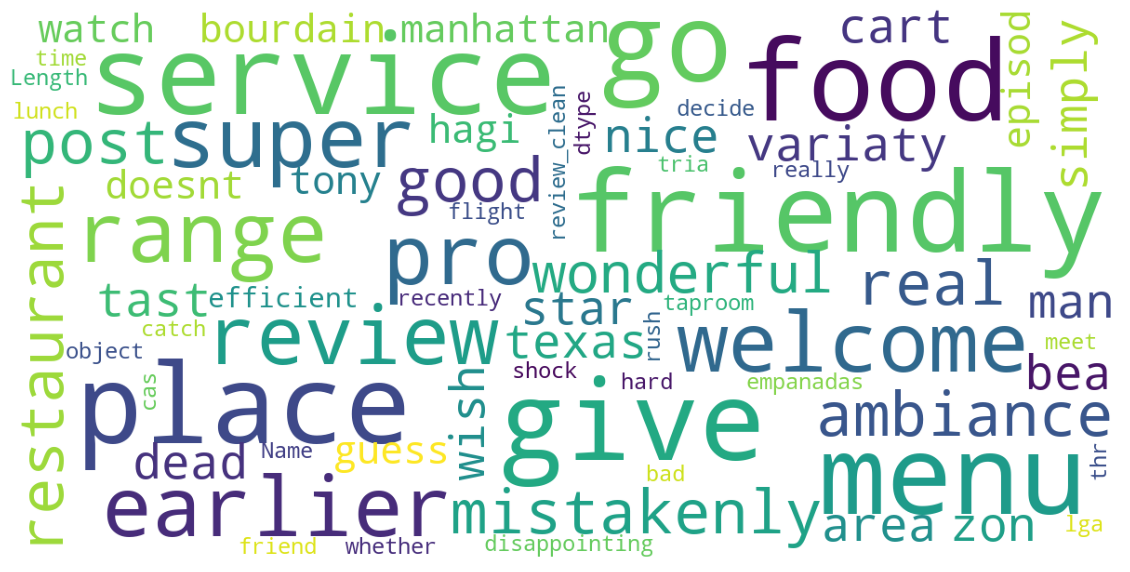

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df['review_clean'])

**Being that most Yelp reviews are positive, it makes sense that the majority of words are related to a good dining experience (friendly, welcome, food, place, menu, service).**

## Negative Sentiment WordCloud

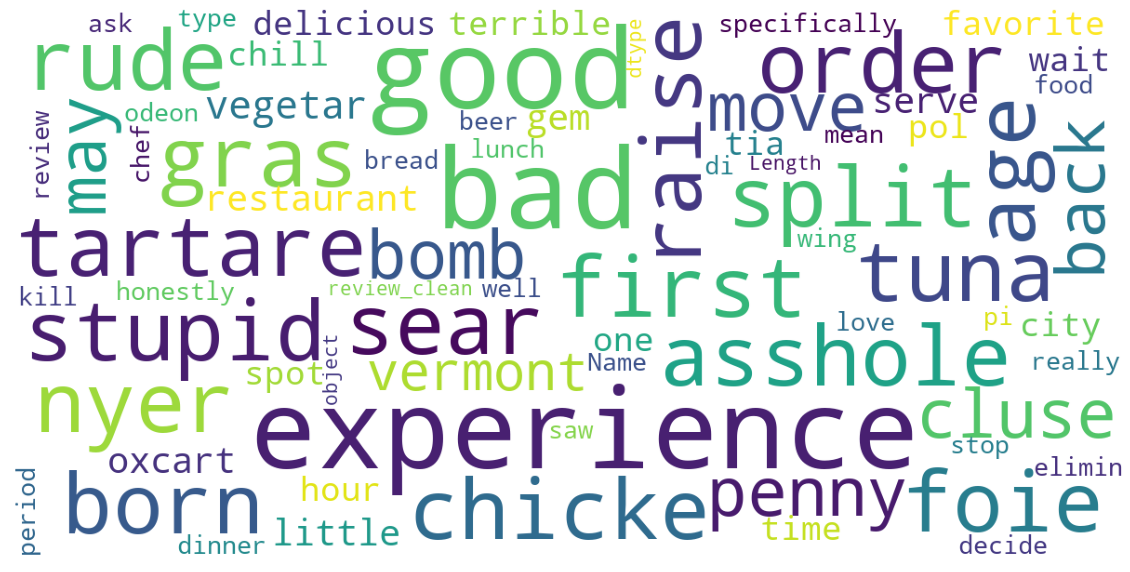

In [27]:
# Get reviews with negative sentiment; bad review ratings may not necessarily be negative
neg_snmt_reviews = reviews_df[reviews_df['compound'] <= -0.05]

show_wordcloud(neg_snmt_reviews['review_clean'])

**Bad (negative) reviews have words predominantly describing service and ordering, especially when it comes to employees (i.e. wait staff, host, manager); these words include "stupid", "asshole", "rude", "bomb", "bad"). Also, negative associations with certain foods are prevalent (tartare, seared tuna, foie gras), perhaps because the reviewer's expectations were high for fine dining.**

## What are the 10 most frequent words in the reviews?

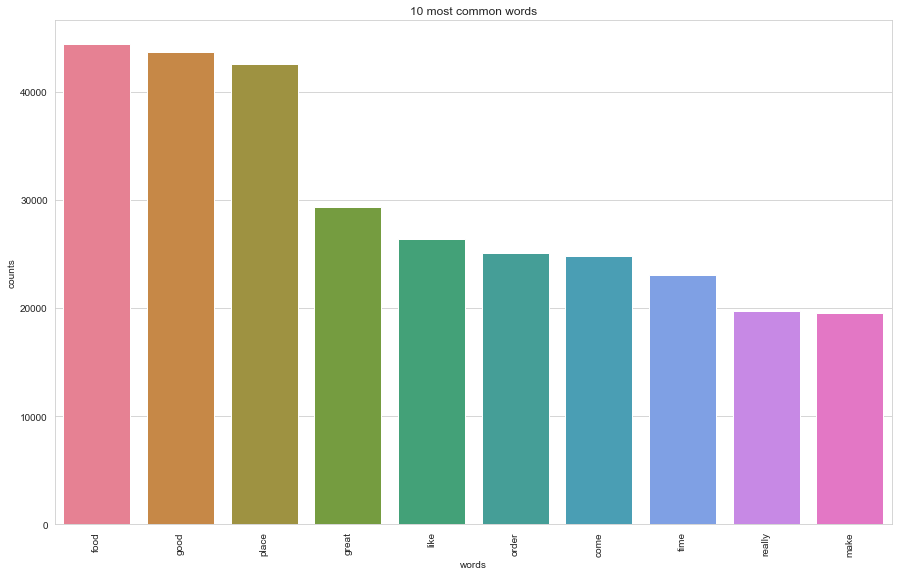

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_df['review_clean'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

**Yelp reviewers are using words, such as 'food', 'good', 'place', 'great', and 'like', indicating most reviews are positive about the quality of food or the venue itself.**

## Highest positive and negative sentiment reviews with sample text

In [29]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df['nb_words'] >= 5].sort_values('pos', ascending = False)[['review_clean', 'pos']].head(10)

review_clean    pos
7150                   love place  delicious fun friendly  0.935
543146                     sweet lover look cute creative  0.927
27261   wow good hallelujah  took girlfriend like supe...  0.892
339518  great warm friendly place delicious innovate food  0.890
15431   friendly staff fantastic food great concept  l...  0.887
487865  beautiful intimate breathtaking cozy friendly ...  0.873
185193     maybe best  fresh delicious vibrant atmosphere  0.872
413759          great place awesome good cool environment  0.870
73087   great place celebrate special occasion truly d...  0.870
593420                     great food good fun good price  0.868

In [30]:
# highest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df['nb_words'] >= 5].sort_values('neg', ascending = False)[['review_clean', 'neg']].head(10)

review_clean    neg
69939         horribly overcrowd fill stupid sloppy drunk  0.754
275173               place suck owner dick screw employee  0.717
338444                              get sick eat food bad  0.694
593110  gross food satay away service terrible food worse  0.650
39255   walk serve disgustingly dirty tea pot dirty me...  0.643
375476                  tourist trap pzza nothing amazing  0.642
182031                    food bad service bad  i go back  0.636
427765                horrible food poison frog leg never  0.636
459741   rudest bartender ever make thoroughly unpleasant  0.633
449114  awful  awful decor awful food awful air condit...  0.632

As you can see, highest positive sentiment is really positive and highest negative sentiment is really terrible.

## Random Forest Classifier and Feature Importance

In [31]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, 'review_text', 'review_clean']
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label],
                                                    test_size = 0.20, random_state = 42)

# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.029949
2                  pos    0.027447
0                  neg    0.026236
10    doc2vec_vector_4    0.015965
1                  neu    0.012882
6482           word_ok    0.010726
2512    word_delicious    0.008885
643           word_bad    0.008431
9     doc2vec_vector_3    0.007046
4             nb_chars    0.006513
4133        word_great    0.006436
6     doc2vec_vector_0    0.006141
7     doc2vec_vector_1    0.006024
8     doc2vec_vector_2    0.005827
5             nb_words    0.005817
6361      word_nothing    0.005610
936         word_bland    0.005465
4050         word_good    0.005352
5803     word_mediocre    0.005347
850          word_best    0.004886

**Sentiment values - compound, positive, negative, neutral** - are the top features determining whether a review is good or bad

**Let's dig deeper into how key features contribute to Random Forest model accuracy**

## SHAP Values
- SHAP (**SH**apely **A**dditve ex**P**lantations) values measure the impact of the order of features on model prediction by taking into account their interaction with other features
- Indicates not only which features are important, but also how each feature matters to model prediction; correlates level of feature value to target value
- Based on the hallmark 2018 paper by [Scott Lundberg and Su-In Lee](https://arxiv.org/abs/1705.07874)

## SHAP Summary Plot for Random Forest
- Gives birds-eye view of feature importance and what is driving it
- Y-axis has feature names in order of importance from top to bottom based on the sum of SHAP value magnitudes
- Color shows if feature is high (red) or low (blue) for a particular dataset row (dot)
- Horizontal location shows if the effect of that value causes a higher or lower prediction

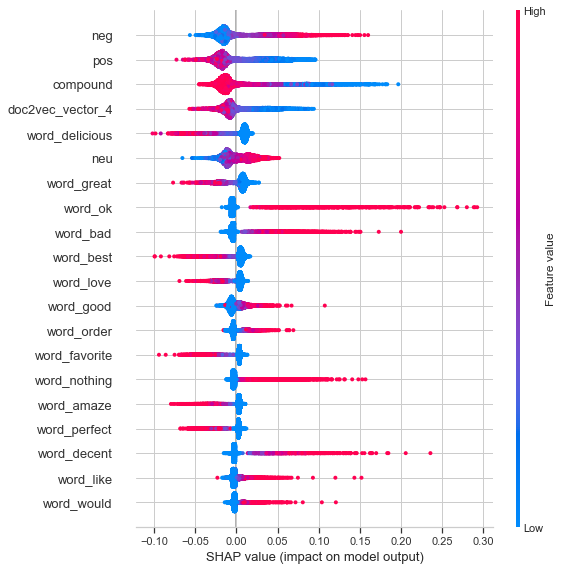

In [107]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test, approximate=True)
shap.summary_plot(shap_values[1], X_test)

### Sample Interpretations
- High values of negative sentiment ('neg') result in higher is_bad_review predictions
- Low vaues of positive sentiment ('pos') and compound score result in higher is_bad_review predictions
- High values of word_ok result in much higher is_bad_review predictions; word_bad, word_nothing, and word_decent also yielded higher is_bad_review predictions

## SHAP Dependence Contribution Plots
- Shows the distribution of a single feature and how this impacts prediction
- *Feature Interaction* - shows if the feature values in the distribution depend on the values of another feature (by color)
- Automatically selects another feature for coloring and effects of interaction

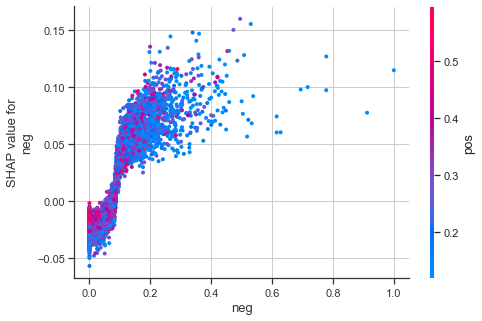

In [108]:
shap.dependence_plot('neg', shap_values[1], X_test)

### Interpretations
- The higher the negative sentiment ('neg'), the higher the model's prediction is for is_bad_review
- Without any positive sentiment ('pos') (blue dots) in the review, the negative sentiment can get very negative (high neg value)
- High positive sentiment (red dots) has no effect on the model's prediction for is_bad_review

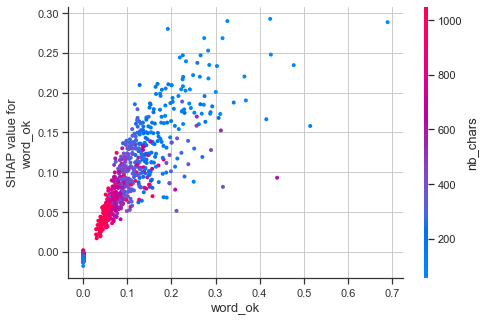

In [114]:
shap.dependence_plot('word_ok', shap_values[1], X_test)

### Interpretations
- The higher the weight of the word_ok, the higher the model's prediction is for is_bad_review
- If nb_chars is high (red dots), the weight of word_ok is low, resulting in slightly higher, if not minimal, effect on model's prediction of is_bad_review
- As nb_chars decreases (purple dots) to low (blue dots), the weight of word_ok increases, resulting in a higher model prediction for is_bad_review

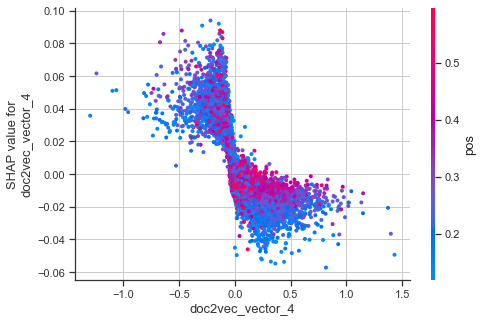

In [116]:
shap.dependence_plot('doc2vec_vector_4', shap_values[1], X_test)

### Interpretations
- The higher the numeric representation of doc2vec_vector_4, the lower the model's prediction is for is_bad_review
- For doc2vec_vector_4 > 0.0, high positive sentiment ('pos') (red dots) documents also have lower model prediction for is_bad_review, but this lower model prediction is not as low as documents with low positive sentiment
- Model prediction is not affected by high or low positive sentiment for documents with doc2vec_vector_4 < 0.0

## ROC Curve and AUC

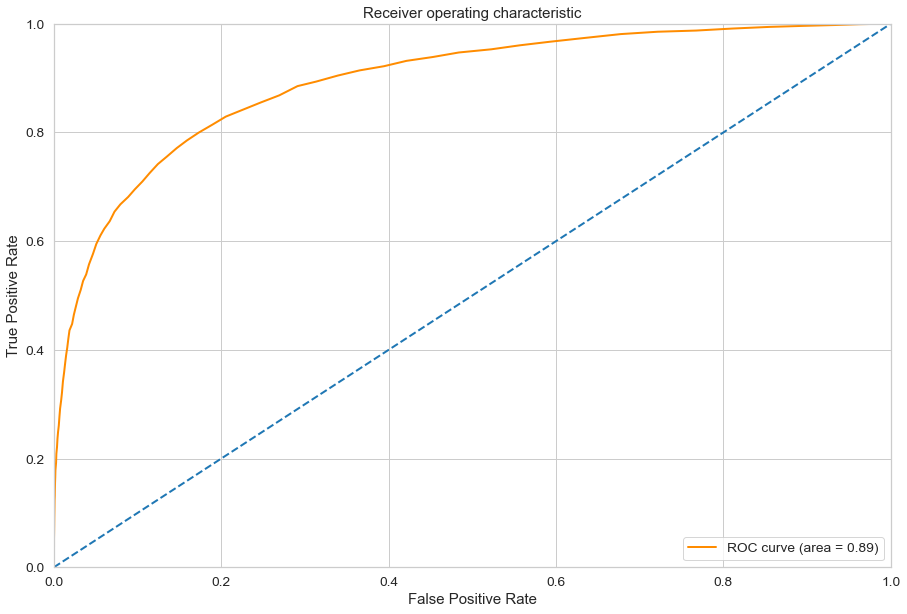

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The higher the curve is above the diagonal baseline, the better the predictions, which is quantified by the ROC area under the curve (AUC = 0.89).

#### **We have an imbalanced classification problem involving two classes: bad reviews in the minority (26.4% of reviews) and good reviews in the majority (73.6% of reviews). Thus, a small number of incorrect predictions can result in large changes in the ROC Curve or ROC AUC score. The Precision-Recall Curve takes into account this imbalanced classification.**

In [33]:
# pip install -U funcsigs

## Precision-Recall Curve
- Focus is on the minority class (bad reviews), making the PR Curve an effective diagnostic for imbalanced binary classification models
- Precision quantifies the number of correct predictions for bad reviews made (True Positive / (True Positive + False Positive))
- Recall quantifies the number of correct predictions for bad reviews made out of all bad reviews predictions that could have been made (True Positive / (True Positive + False Negative))
- A skillful model is represented by a curve that bows towards the (1,1) coordinate
- A model with perfect skill is represented as a point at (1,1) coordinate
- A no-skill classifier is a horizontal line with a precision that is proportional to the number of positive examples in the dataset - in this case, 0.264
- If we want to be confident about our prediction (precision) for bad reviews but do not mind about not finding all the negative reviews, high precision and low recall is selected (left portion of graph)
- If we want to detect most of the negative observations in reviews, high recall is selected; however, as recall approaches 1.0, we do this at the expense of precision, which will be lower (right portion of graph)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

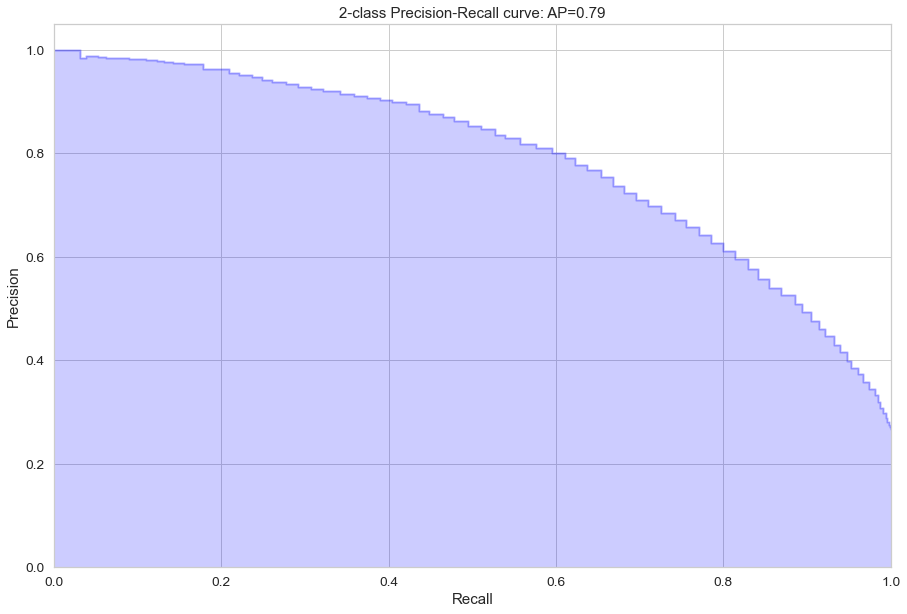

In [34]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

- The Yelp reviews dataset is **highly imbalanced** (0.736 good review, 0.264 bad review)
- At Recall = 1.0, Precision = \~0.5 for a balanced dataset; in our case, Precision @ Recall = 1.0 drops to 0.264, which is low and characteristic of an imbalanced dataset
- Similar to ROC AUC, the AP score summarizes the curve with a range of threshold values. Here, the AP score is high (0.79) and close to 1.0, which represents a model with perfect skill. **Thus, the precision-recall curve is not impacted by the imbalanced dataset.**
- **The ROC and PRC curves together indicate that the Random Forest Classifier is a good classification model for this dataset**

# Topic Modeling
- Discover hidden themes
- Classify documents to themes to streamline organizing, summarizing, searching of documents

## Scikit-learn LDA to Find Topics
- Conduct a simple and quick topic classification
- Find document topics based on words in document
- Sort words based on their probability score then choose top *x* words to represent topic
- LDA model 8-9x faster than Gensim LDA model
- Number of topics is set to 3

In [35]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 3
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
great food good place delicious restaurant dish come service love

Topic #1:
place good food pizza great like best sauce chicken try

Topic #2:
food good place order come like time table bar make


### Main Topics found from Scikit-Learn's LDA
- Topic 0: Overall dine-in experience (food, service)
- Topic 1: Focus on food quality, menu items (i.e. pizza, sauce, chicken)
- Topic 2: Ordering process and service quality

## Collocations: Bigrams and Trigrams Analysis Using NLTK
- Two-word and three-word phrases that reveal keywords in context and essentially act as one word
- Facilitates better understanding of what the reviewers are thinking and expressing

In [36]:
# Convert previously cleaned words from Yelp reviews into a list
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

gen_clean = reviews_df['review_clean'].tolist()
gen_words = list(sent_to_words(gen_clean))
print(gen_words[:1])

[['pro', 'service', 'welcome', 'super', 'friendly', 'menu', 'range', 'item', 'choose', 'burger', 'sandwich', 'hot', 'dog', 'fry', 'food', 'arrive', 'within', 'five', 'minute', 'order', 'million', 'different', 'hot', 'sauce', 'choose', 'breakroom', 'fry', 'everything', 'expect', 'hand', 'sanitizer', 'aftermath', 'con', 'breakroom', 'burger', 'patty', 'pork', 'belly', 'onion', 'ring', 'runny', 'egg', 'lettuce', 'tomato', 'amaze', 'lead', 'believe', 'umami', 'taste', 'know', 'burger', 'bun', 'comparable', 'mcdonald', 'small', 'space', 'hold', 'people', 'mint', 'lemonade', 'subtle', 'almost', 'fake', 'mint', 'taste', 'even', 'though', 'could', 'visibly', 'see', 'mint', 'drink', 'maybe', 'll', 'back', 'friend', 'really', 'want', 'eat', 'blow', 'away', 'food', 'fry', 'really', 'good', 'anything', 'can', 'recreate', 'home', 'expect', 'well', 'steep', 'price', 'compare', 'rest', 'chinatown', 'still', 'decide', 'check', 'heard', 'fish', 'taco', 'killer']]


In [37]:
# Convert previously cleaned words from BAD Yelp reviews into a list
gen_clean_bad = neg_snmt_reviews['review_clean'].tolist()
gen_bad_words = list(sent_to_words(gen_clean_bad))

In [38]:
print(gen_bad_words[:1])

[['order', 'sear', 'foie', 'gras', 'split', 'tuna', 'tartare', 'chicken', 'lunch', 'piece', 'foie', 'gras', 'rather', 'two', 'piece', 'large', 'piece', 've', 'ever', 'foie', 'gras', 'appetizer', 'seriously', 'hit', 'spot', 'maybe', 'little', 'well', 'first', 'dish', 'already', 'want', 'go', 'sleep', 'hit', 'gym', 'tuna', 'tartare', 'follow', 'foie', 'gras', 'disappointment', 'small', 'piece', 'dice', 'tuna', 'mixed', 'small', 'piece', 'dice', 'beet', 'color', 'size', 'felt', 'cheat', 'chicken', 'decent', 'service', 'fantastic', 'tell', 'server', 'splitting', 'chicken', 'entree', 'bring', 'already', 'divide', 'two', 'plate', 'food', 'our', 'glass', 'never', 'low', 'water', 'never', 'wait', 'long', 'next', 'course']]


In [39]:
# Initialize NLTK's Bigrams/Trigrams Finder
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

# All reviews
unlist_comments = [item for items in gen_words for item in items]
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(unlist_comments)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(unlist_comments)

# Negative reviews
unlist_bad_comments = [item for items in gen_bad_words for item in items]
bigramBadFinder = nltk.collocations.BigramCollocationFinder.from_words(unlist_bad_comments)
trigramBadFinder = nltk.collocations.TrigramCollocationFinder.from_words(unlist_bad_comments)

In [40]:
# Bad reviews
unlist_bad_comments = [item for items in gen_bad_words for item in items]
bigramBadFinder = nltk.collocations.BigramCollocationFinder.from_words(unlist_bad_comments)
trigramBadFinder = nltk.collocations.TrigramCollocationFinder.from_words(unlist_bad_comments)

### Frequency with Filter
- Most frequent bigrams and trigrams
- Filter out stop words and structures: (1) Bigram - (Noun, Noun), (Adjective, Noun); (2) Trigram - (Adjective/Noun, Anything, Adjective/Noun)

In [41]:
# All reviews
# Count Frequencies of Adjacent Bigram Words specifically for adjective-noun parts-of-speech
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq),
                               columns=['bigram','freq']).sort_values(by='freq', ascending=False)

stop = set(stopwords.words('english'))

#function to filter for ADJ/NN bigrams
def rightTypes(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

# filter bigrams
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
freq_bi = filtered_bi[:20].bigram.values

In [42]:
# Negative reviews
# Count Frequencies of Adjacent Bigram Words specifically for adjective-noun parts-of-speech
bad_bigram_freq = bigramBadFinder.ngram_fd.items()
badbigramFreqTable = pd.DataFrame(list(bad_bigram_freq),
                               columns=['bigram','freq']).sort_values(by='freq', ascending=False)

# filter bad bigrams
bad_filtered_bi = badbigramFreqTable[badbigramFreqTable.bigram.map(lambda x: rightTypes(x))]
bad_freq_bi = bad_filtered_bi[:20].bigram.values

In [43]:
# All reviews
# Count Frequencies of Adjacent Trigram Words specifically for adjective-noun parts-of-speech
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq),
                                columns=['trigram','freq']).sort_values(by='freq', ascending=False)

def rightTypesTri(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or '  ' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop:
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False

# filter trigrams
filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]
freq_tri = filtered_tri[:20].trigram.values

In [44]:
# Negative reviews
# Count Frequencies of Adjacent Trigram Words specifically for adjective-noun parts-of-speech
bad_trigram_freq = trigramBadFinder.ngram_fd.items()
badtrigramFreqTable = pd.DataFrame(list(bad_trigram_freq),
                                columns=['trigram','freq']).sort_values(by='freq', ascending=False)

# filter trigrams
bad_filtered_tri = badtrigramFreqTable[badtrigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]
bad_freq_tri = bad_filtered_tri[:20].trigram.values

### Pointwise Mutual Information (PMI)
- Measures likelihood of words co-occurring
- Takes into account **probability lift** of two or three words being mentioned together by reviewers

In [45]:
# All reviews
# Assess Bigram/Trigram frequencies using PMI score
bigramFinder.apply_freq_filter(20)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)),
                              columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
pmi_bi = bigramPMITable[:20].bigram.values

trigramFinder.apply_freq_filter(20)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)),
                               columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
pmi_tri = trigramPMITable[:20].trigram.values

In [46]:
# Negative reviews
bigramFinder.apply_freq_filter(20)
badbigramPMITable = pd.DataFrame(list(bigramBadFinder.score_ngrams(bigrams.pmi)),
                              columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
bad_pmi_bi = badbigramPMITable[:20].bigram.values

trigramBadFinder.apply_freq_filter(20)
badtrigramPMITable = pd.DataFrame(list(trigramBadFinder.score_ngrams(trigrams.pmi)),
                               columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
bad_pmi_tri = badtrigramPMITable[:20].trigram.values

### Display Top Collocation Results

#### Bigrams - All Reviews

In [47]:
# All reviews
# Compare the Frequency with Filter and PMI methods for Bigrams
bigramsCompare = pd.DataFrame([freq_bi, pmi_bi]).T
bigramsCompare.columns = ['Frequency With Filter', 'PMI']
bigramsCompare

Frequency With Filter                    PMI
0           (food, good)          (palo, santo)
1          (first, time)           (fette, sau)
2          (great, food)          (nasi, lemak)
3            (new, york)            (modo, mio)
4           (next, time)            (ba, xuyen)
5           (good, food)               (wi, fi)
6         (great, place)        (barrio, chino)
7          (happy, hour)             (tia, pol)
8           (ice, cream)           (surf, turf)
9          (mac, cheese)          (osso, bucco)
10      (great, service)            (kool, aid)
11         (last, night)  (lactose, intolerant)
12       (french, toast)              (bi, bim)
13        (fry, chicken)        (lomo, saltado)
14       (good, service)           (ping, pong)
15         (good, place)          (beau, monde)
16       (food, service)               (tl, dr)
17         (wait, staff)             (bim, bap)
18          (hot, sauce)            (tai, fung)
19         (worth, wait)            (ai, fiori)

#### Bigrams - Negative Reviews

In [48]:
# Negative reviews
badbigramsCompare = pd.DataFrame([bad_freq_bi, bad_pmi_bi]).T
badbigramsCompare.columns = ['Frequency With Filter', 'PMI']
badbigramsCompare

Frequency With Filter                       PMI
0          (first, time)              (abd, gyros)
1    (customer, service)         (pinata, laconia)
2           (food, good)         (quiver, anxiety)
3         (bad, service)        (quakey, unsettle)
4           (last, time)           (purty, wtheck)
5         (wait, minute)   (professed, italophile)
6          (last, night)      (primitive, hominid)
7            (new, york)       (priest, strangler)
8          (give, place)   (prescription, glasses)
9         (place, order)  (premier, restauranteur)
10          (good, food)             (preise, vom)
11     (bad, experience)             (pray, alter)
12     (din, experience)         (pouilly, fuisse)
13           (bad, food)           (poboy, softie)
14       (poor, service)         (playitcool, gif)
15          (next, time)        (phooey, godammit)
16        (credit, card)       (krugman, einstein)
17         (waste, time)            (phoenix, ash)
18       (quality, food)               (pf, chang)
19         (order, food)       (petrify, violence)

#### Trigrams - All Reviews

In [49]:
# All reviews
# Compare the Frequency with Filter and PMI methods for Trigrams
trigramsCompare = pd.DataFrame([freq_tri, pmi_tri]).T
trigramsCompare.columns = ['Frequency With Filter', 'PMI']
trigramsCompare

Frequency With Filter                             PMI
0      (sweet, potato, fry)                (cho, dang, gol)
1      (great, food, great)                  (coq, au, vin)
2    (food, great, service)               (pico, de, gallo)
3      (food, pretty, good)                (fogo, de, chao)
4         (new, york, city)              (dulce, de, leche)
5       (give, place, star)  (shawarma, shawarma, shawarma)
6      (food, really, good)    (shiromaru, hakata, classic)
7    (nothing, write, home)                (alma, de, cuba)
8     (food, good, service)                 (nom, nom, nom)
9    (service, great, food)                (din, tai, fung)
10       (good, food, good)             (arroz, con, pollo)
11    (french, onion, soup)           (add, insult, injury)
12  (great, service, great)                  (bun, bo, hue)
13         (thai, ice, tea)            (chilean, sea, bass)
14    (vanilla, ice, cream)              (out, of, towners)
15     (thin, crust, pizza)              (blah, blah, blah)
16      (soft, shell, crab)              (tres, lech, cake)
17   (happy, hour, special)    (yelp, com, user_local_phot)
18    (worth, every, penny)         (yelp, com, biz_photos)
19      (food, good, price)          (sheep, milk, ricotta)

#### Trigrams - Negative Reviews

In [50]:
# Negative reviews
badtrigramsCompare = pd.DataFrame([bad_freq_tri, bad_pmi_tri]).T
badtrigramsCompare.columns = ['Frequency With Filter', 'PMI']
badtrigramsCompare

Frequency With Filter                   PMI
0             (give, place, star)   (never, come, back)
1          (bad, din, experience)     (never, go, back)
2       (poor, customer, service)  (bad, service, ever)
3           (food, good, service)                  None
4   (horrible, customer, service)                  None
5        (bad, customer, service)                  None
6             (last, time, order)                  None
7              (wait, long, time)                  None
8            (food, bad, service)                  None
9        (food, nothing, special)                  None
10          (avoid, avoid, avoid)                  None
11                 (pad, see, ew)                  None
12         (pull, pork, sandwich)                  None
13        (wait, another, minute)                  None
14         (nothing, write, home)                  None
15          (french, onion, soup)                  None
16        (food, decent, service)                  None
17           (waste, time, money)                  None
18      (credit, card, statement)                  None
19            (bad, taste, mouth)                  None

**All reviews**  
The **Frequency With Filter** method gives results that describe the dining experience in vernacular terms - french onion soup, ice cream, wait staff, food service, etc. In contrast, the **Pointwise Mutual Information (PMI)** method captures specialty phrases from reviews, often identifying specialty ethnic cuisine - pico de gallo, coq au vin, bi bim bap, arroz con pollo. PMI trigrams also capture popular restaurants. Din Tai Fung is a Michelin-star Taiwanese restaurant specializing in pork dumplings. Cho Dang Gol is a Michelin Bib Gourmand (good quality, good value) Korean restaurant in NYC. Reviews are generally positive with a few negative ones ("nothing write home", "add insult injury"). Both methods yield bigrams and trigrams that give insight into what Yelp reviewers are mentioning in their reviews.

**Negative reviews**  
Negative reviews also use words similar to all reviews. However, negative phrases come into focus and are a general representation of negative sentiment in reviews. This analysis was done on the entire corpus of negative sentiment Yelp reviews. However, managers/owners can do the same type of analysis on their own restaurant/business and use these results to identify customer issues, which will allow them to rectify these issues in a timely manner if they want to retain customers and save their reputation. For example, bigram and trigram phrases can be used to glean over comments pertaining to poor service and long wait times ("wait minute", "wait long time", "horrible customer service"), poor quality entrees ("pad see ew"), overall experience ("bad din(ing) experience"), and customer anger/disappointment ("give place (0) star" (if I could), "go somewhere else").

## Gensim LDA to Find Topics
- More built-in functionality and applications for LDA model
- Deep dive into reviews and results
- Number of topics is set to 3

In [51]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(gen_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[gen_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts):
    """Form Bigrams and Trigrams"""
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = texts
    
    return texts_out

gen_ready = process_words(gen_words)

### What is the Term Document Frequency for each topic?

In [52]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(gen_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in gen_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


Single number represents topic. Then each word is associated with a probability value. The higher the value, the higher the topic frequency.

In [53]:
print(lda_model.print_topics())

[(0, '0.026*"food" + 0.026*"place" + 0.025*"great" + 0.019*"good" + 0.013*"go" + 0.012*"love" + 0.012*"best" + 0.011*"service" + 0.009*"the" + 0.009*"menu"'), (1, '0.015*"good" + 0.014*"chicken" + 0.014*"sauce" + 0.012*"dish" + 0.011*"fry" + 0.010*"order" + 0.009*"the" + 0.009*"flavor" + 0.009*"like" + 0.008*"also"'), (2, '0.016*"get" + 0.014*"go" + 0.012*"order" + 0.011*"time" + 0.010*"say" + 0.010*"pizza" + 0.010*"wait" + 0.009*"like" + 0.009*"come" + 0.009*"take"')]


### What is the dominant topic and percentage contribution in each document?

In [54]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=gen_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=gen_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.3602   
1            1             0.0              0.4646   
2            2             0.0              0.7791   
3            3             0.0              0.5061   
4            4             2.0              0.5839   
5            5             0.0              0.7921   
6            6             1.0              0.4625   
7            7             2.0              0.4147   
8            8             2.0              0.3888   
9            9             0.0              0.4042   

                                            Keywords  \
0  get, go, order, time, say, pizza, wait, like, ...   
1  food, place, great, good, go, love, best, serv...   
2  food, place, great, good, go, love, best, serv...   
3  food, place, great, good, go, love, best, serv...   
4  get, go, order, time, say, pizza, wait, like, ...   
5  food, place, great, good, go, love, best, serv...   
6  good, chicken, sauce, dish, fry, order, the, f...   
7  get, go, order, time, say, pizza, wait, like, ...   
8  get, go, order, time, say, pizza, wait, like, ...   
9  food, place, great, good, go, love, best, serv...   

                                                Text  
0  [pro, service, welcome, super, friendly, menu,...  
1  [earlier, review, mistakenly, post, restaurant...  
2  [food, good, ambiance, wonderful, menu, variat...  
3  [would, give, bea, star, could, simply, area, ...  
4  [place, nice, man, wish, cart, texas, guess, d...  
5  [go, back, happy, staff, family, run, place, s...  
6  [come, first, time, last, night, reservation, ...  
7  [might, notice, something, burger, fanatic, ll...  
8  [cookie_cutter, loft, feel, undercooked, dare,...  
9  [thoroughly_enjoy, din, experience, pizzeria_v...

### What is the overall document distribution of word counts?

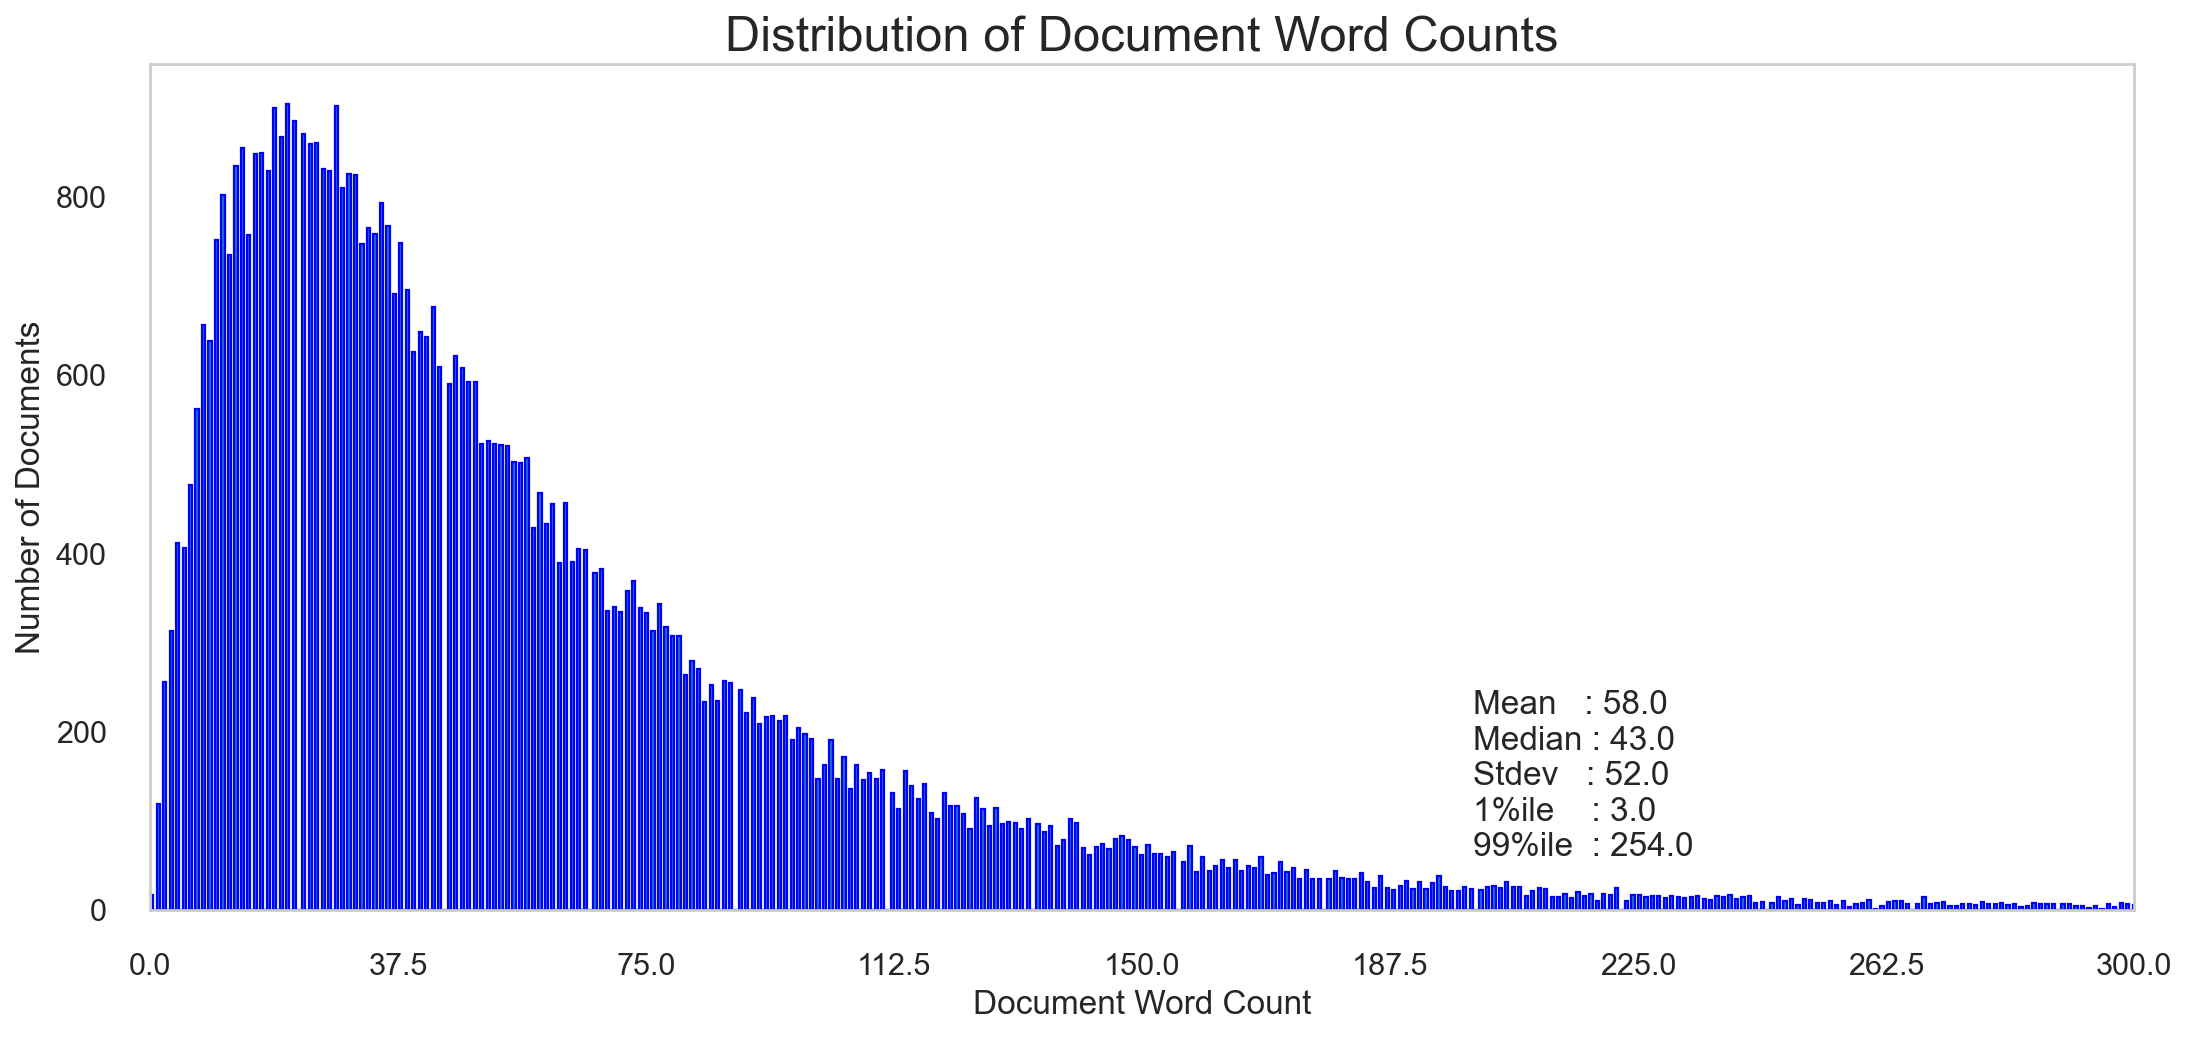

In [55]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, edgecolor='b', linewidth=1)
plt.text(200, 220, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(200,  180, "Median : " + str(round(np.median(doc_lens))))
plt.text(200,  140, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(200,  100, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(200,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 300), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,300,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

### What is the document distribution of word counts by topic?

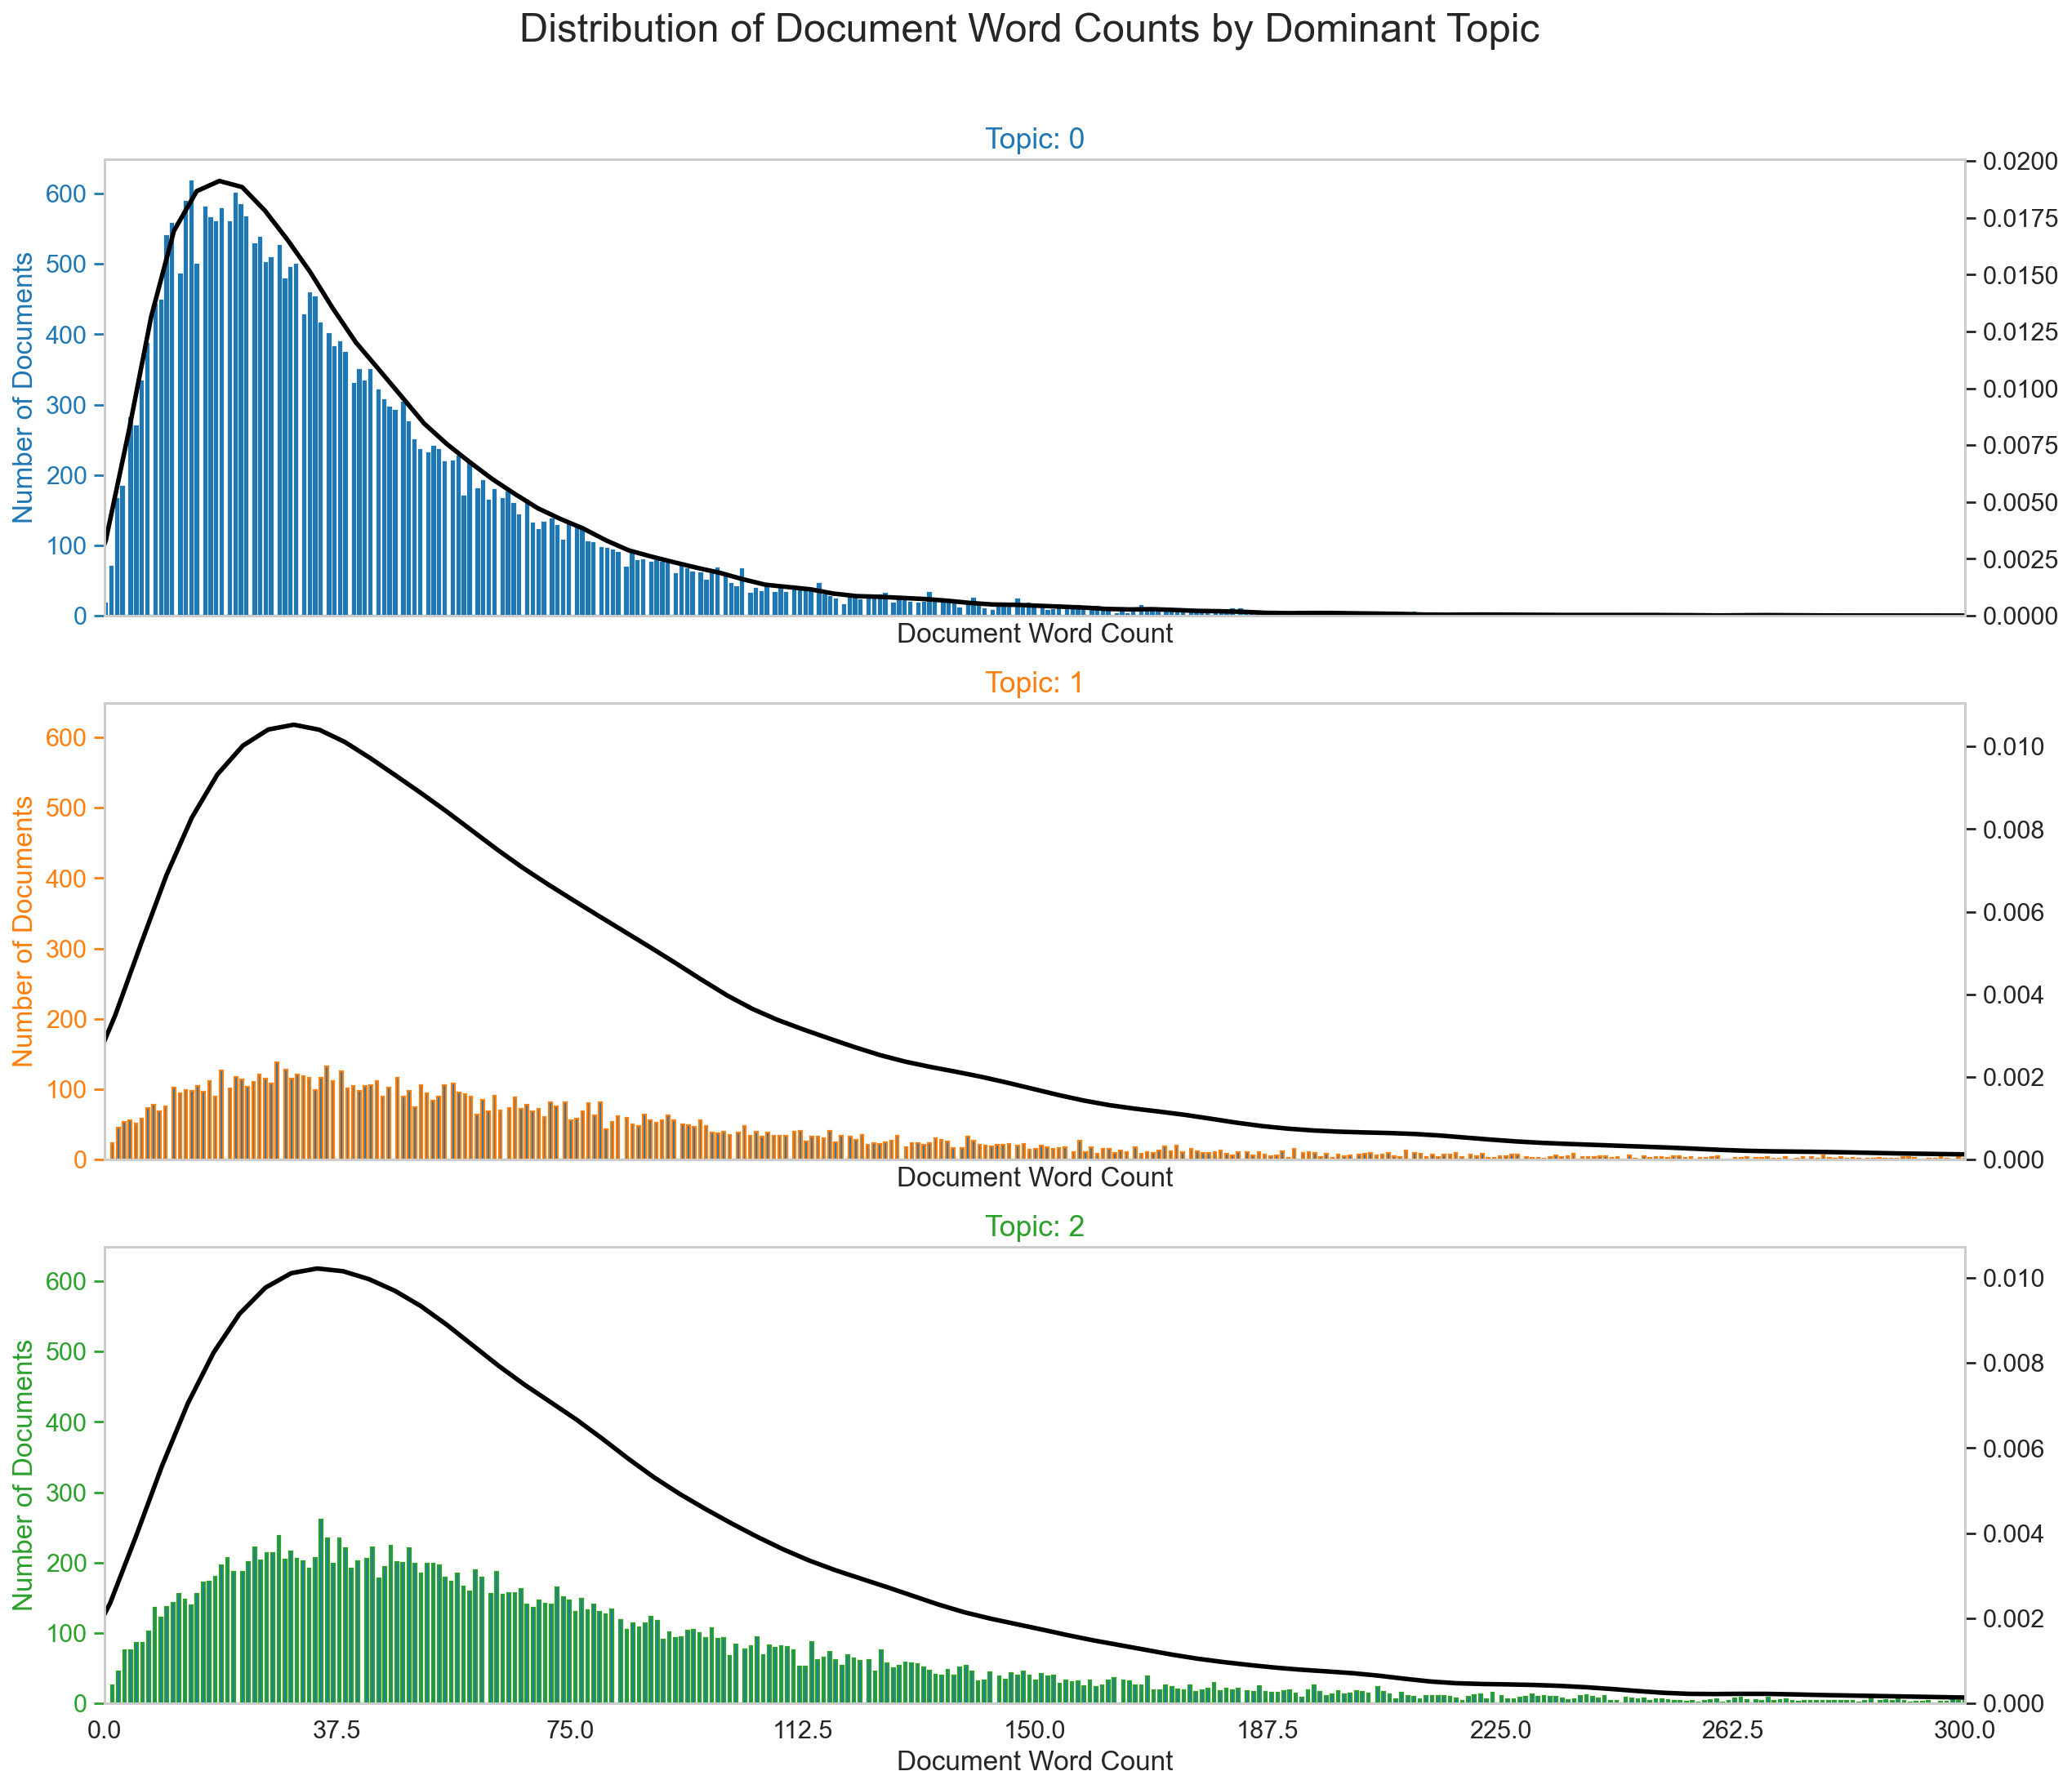

In [74]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,1,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, edgecolor=cols[i], linewidth=1)
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 300), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,300,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.rcParams["axes.grid"] = False
plt.show()

Reviews for Gensim LDA Topic 1 are, relatively, far fewer than the other topics

### Show keywords by topic in WordClouds

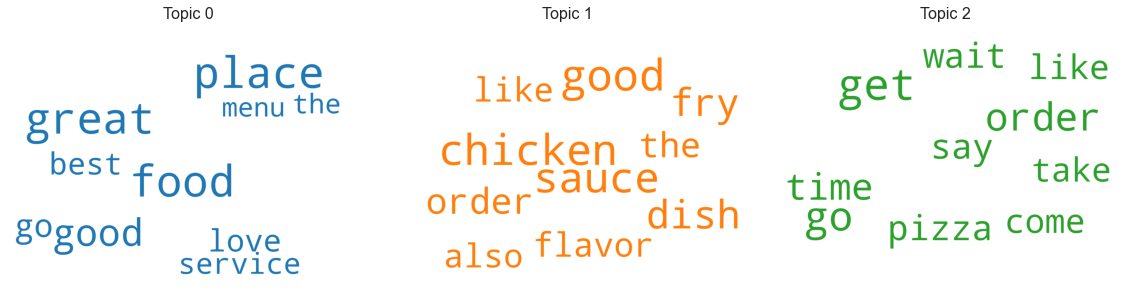

In [75]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(16,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### How many documents are there by dominant topics?

In [64]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

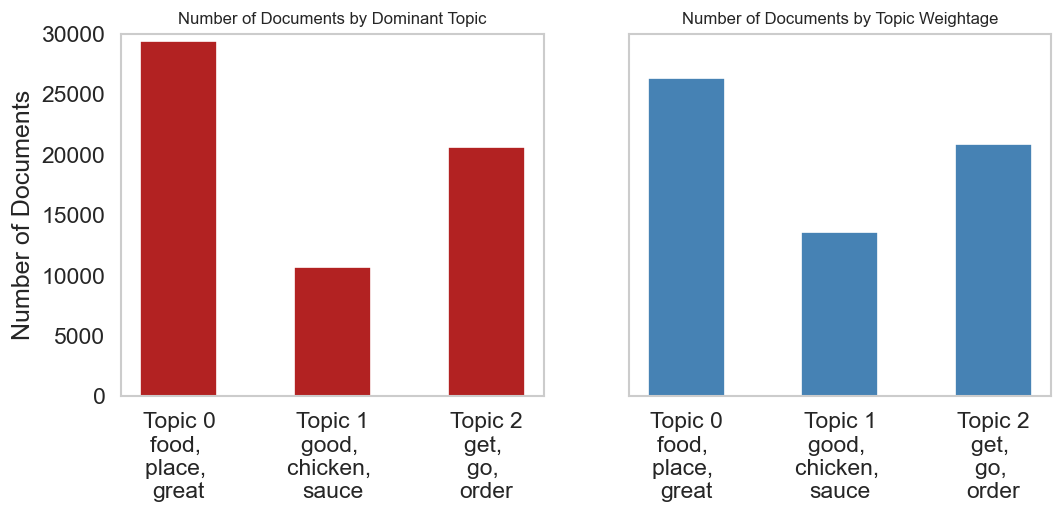

In [65]:
from matplotlib.ticker import FuncFormatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 30000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### Main Topics found from Gensim's LDA
- Topic 0: Overall dine-in experience
- Topic 1: Food quality and entree (i.e. flavor, fried, sauce, chicken, dish)
- Topic 2: Ordering process and service quality

### A 'Scatterpie' plot shows number of documents (scatterplot/dots) grouped/clustered by dominant topics (color)

In [67]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
#output_notebook()
#n_topics = 3
#mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
#plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#              plot_width=900, plot_height=700)
#plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
#show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60606 samples in 0.146s...
[t-SNE] Computed neighbors for 60606 samples in 3.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60606
[t-SNE] Computed conditional probabilities for sample 2000 / 60606
[t-SNE] Computed conditional probabilities for sample 3000 / 60606
[t-SNE] Computed conditional probabilities for sample 4000 / 60606
[t-SNE] Computed conditional probabilities for sample 5000 / 60606
[t-SNE] Computed conditional probabilities for sample 6000 / 60606
[t-SNE] Computed conditional probabilities for sample 7000 / 60606
[t-SNE] Computed conditional probabilities for sample 8000 / 60606
[t-SNE] Computed conditional probabilities for sample 9000 / 60606
[t-SNE] Computed conditional probabilities for sample 10000 / 60606
[t-SNE] Computed conditional probabilities for sample 11000 / 60606
[t-SNE] Computed conditional probabilities for sample 12000 / 60606
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

# LDAvis: Visualize and interpret topics
- Topic's overall prevalence (left panel) is encoded by circle areas
- Overlapping circles mean overlapping topics
- *Most Relevant Terms (right panel):* **Red:** Topic-specific frequency of term; **Blue:** Corpus-wide frequency
- Adjust $\lambda$ for term rankings - small $\lambda$ values = rare, exclusive terms; large $\lambda$ = frequent but not necessarily exclusive terms
- $\lambda$ = 0.6 is used for topic interpretation

## Gensim LDA Topics Visualization

In [68]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_gensim = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis_gensim

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.165765  0.165256       1        1  39.365456
0     -0.101441 -0.194091       2        1  35.466812
1      0.267206  0.028835       3        1  25.167730, topic_info=        Term          Freq         Total Category  logprob  loglift
185    great  31760.000000  31760.000000  Default  30.0000  30.0000
29      food  43112.000000  43112.000000  Default  29.0000  29.0000
226    place  43223.000000  43223.000000  Default  28.0000  28.0000
93   chicken  12390.000000  12390.000000  Default  27.0000  27.0000
67     sauce  12079.000000  12079.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
245     come   6106.806641  24190.966797   Topic3  -4.9785   0.0030
394    fresh   4392.620117   8492.133789   Topic3  -5.3080   0.7204
106      get   6273.992188  35309.171875   Topic3  -4.9515  -0.3481
61    really   5199.281738  20468.939453   Topic3  -5.1394   0.0092
309   little   4412.784180  11558.270508   Topic3  -5.3034   0.4167

[200 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
141       1  0.067618       also
141       2  0.450096       also
141       3  0.482282       also
465       2  0.999846     always
2         2  0.999924      amaze
...     ...       ...        ...
167       2  0.999563  wonderful
167       3  0.000373  wonderful
168       1  0.658229      would
168       2  0.176028      would
168       3  0.165789      would

[245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

## *Compare with:*

## Scikit-Learn LDA Topics Visualization

In [69]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis_sklearn = pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)
vis_sklearn

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.032984  0.069090       1        1  38.232272
0     -0.052039 -0.059485       2        1  33.288053
1      0.085023 -0.009605       3        1  28.479675, topic_info=             Term          Freq         Total Category  logprob  loglift
33448       pizza  11427.000000  11427.000000  Default  30.0000  30.0000
37045        rice   4786.000000   4786.000000  Default  29.0000  29.0000
5736       brunch   6189.000000   6189.000000  Default  28.0000  28.0000
3309          bar   9449.000000   9449.000000  Default  27.0000  27.0000
29994      noodle   4007.000000   4007.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
9058         come   5655.845303  24327.205240   Topic3  -5.0330  -0.2029
39210     service   4932.778107  18929.235466   Topic3  -5.1697  -0.0888
11620   delicious   4459.444491  14977.528837   Topic3  -5.2706   0.0445
36769  restaurant   4351.653923  17186.021657   Topic3  -5.2951  -0.1176
11499  definitely   3683.603791  10525.093172   Topic3  -5.4618   0.2061

[314 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
930        2  0.995897  akamaru
1022       1  0.981949      ale
1022       2  0.003944      ale
1022       3  0.011831      ale
1328       1  0.144972    amaze
...      ...       ...      ...
49463      1  0.010254   yogurt
49463      2  0.951029   yogurt
49463      3  0.038451   yogurt
49654      2  0.996071     yuzu
49685      2  0.995988    zahav

[556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

## Topic Comparisons
**Gensim LDA**
- Topic 0: Overall dine-in experience (atmosphere, staff, price, food)
- Topic 1: Food quality and entree (i.e. flavor, fried, sauce, chicken, dish)
- Topic 2: Ordering process and service quality (interactions with wait staff)

**Scikit-Learn LDA**
- Topic 0: Overall dine-in experience (food, service)
- Topic 1: Focus on food quality, menu items (i.e. pizza, sauce, chicken)
- Topic 2: Ordering process and service quality (i.e. bar service, gastropubs)

**Results from Gensim LDA and Scikit-Learn LDA are pretty much the same and revolve around the same topics. More insights into these topics are shown in the LDA Topics Visualization above.**

## Discussion

This Natural Language Processing analysis was done on the entire corpus of Yelp reviews. However, managers/owners can select online reviews of their own restaurant/business and use these results to identify key customer issues. This analysis will allow them to rectify these issues in a timely manner if they want to retain customers and save their reputation on social media.

Determining keywords, customer sentiment, and key phrases and topics as well as predicting reviewer ratings through Natural Language Processing is critical, especially in the age of COVID-19. The online premiere restaurant review website, [The Infatuation](https://www.theinfatuation.com/), which owns Zagat, [recently announced](https://abcnews.go.com/Business/infatuation-dropped-restaurant-ratings-reviews-wake-covid-19/story?id=71535013) they are eliminating the ratings metric to allow for "new possibilites and more insightful resources for the new dining landscape" since diners are seeking different criteria when deciding where to eat during COVID-19. Thus, text analytics/NLP can help not only managers/business owners navigate reviews to determine key quality issues, but also customers find an accurate representation of what they want in a dining experience.

# Conclusion

We break down Yelp reviews by keywords, key phrases (bigrams and trigrams), reviewer sentiment, and topics to get insight into what motivates reviewers to give good or bad ratings. In general, analysis with Natural Language Processing can be used to predict and categorize good or bad ratings from a test set if the star ratings were absent. Managers/owners can then use this information to target specific groups using best-practice marketing techniques so that the reviewing customers can turn into loyal customers.